### 1. Etapas do algoritmo Random Forest
1. Separação do dataset em subconjuntos de linhas e colunas aleatórias;
2. Atribuição de pesos de acordo com o nível de acerto nos resultados;
3. Analisar a acurácia e precisão das árvores de decisão construídas;
4. Classificar o resultado predito;
5. Obter a média ou maior frequência através da agregação do resultado obtido das árvores construídas.

### 2. Random Forest 
O Random Forest consiste em uma técnica Bagging que utiliza várias subamostras de múltiplas árvores independentes entre si usando a média dos resultados visando a melhoria da precisão do modelo final;

### 3. Diferença entre Bagging e Random Forest
O Random Forest se diferencia por utilizar um dataset de características totalmente aleatórias do conjunto total dos dados, sendo escolhida a melhor  divisão do subconjunto para dividir cada nó em uma árvore, ao contrário do Bagging onde todas as características acabam sendo consideradas para divisão dos nós.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')
seed=0

In [2]:
df = pd.read_csv("C:/Users/Allan/Documents/Material de apoio/Módulo 16 - TdD IV - Pandas avançado/input/dados.csv")
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [3]:
dados = pd.get_dummies(df, columns=['sexo','posse_de_veiculo','posse_de_imovel','mau','tipo_renda','educacao','estado_civil','tipo_residencia'], drop_first=True)
dados.rename(columns={'sexo_M': 'masculino',
                      'posse_de_veiculo_Y': 'possui_veiculo',
                      'posse_de_imovel_Y': 'possui_imovel',
                      'educacao_Higher education': 'superior_completo',
                      'educacao_Incomplete higher': 'superior_incompleto',
                      'educacao_Lower secondary': 'ensino_basico',
                      'educacao_Secondary / secondary special': 'ensino_medio',
                      'tipo_renda_Pensioner': 'pensionista',
                      'tipo_renda_State servant': 'servidor_publico',
                      'tipo_renda_Student': 'estudante',
                      'tipo_renda_Working': 'empregado',
                      'estado_civil_Married': 'casado',
                      'estado_civil_Separated': 'separado',
                      'estado_civil_Single / not married': 'solteiro',
                      'estado_civil_Widow': 'viuvo',
                      'tipo_residencia_House / apartment': 'apartamento',
                      'tipo_residencia_Municipal apartment': 'aluguel_social',
                      'tipo_residencia_Office apartment': 'residencia_oficial',
                      'tipo_residencia_Rented apartment': 'aluguel',
                      'tipo_residencia_With parents': 'mora_com_pais',
                      'mau_True': 'Class'}, inplace=True)

dados=dados[['Class','qtd_filhos', 'idade', 'tempo_emprego', 'possui_celular',
       'possui_fone_comercial', 'possui_fone', 'possui_email',
       'qt_pessoas_residencia', 'masculino', 'possui_veiculo', 'possui_imovel',
        'pensionista', 'servidor_publico', 'estudante', 'empregado',
       'superior_completo', 'superior_incompleto', 'ensino_basico',
       'ensino_medio', 'casado', 'separado', 'solteiro', 'viuvo',
       'apartamento', 'aluguel_social', 'residencia_oficial', 'aluguel',
       'mora_com_pais']]
dados.isna().sum()

Class                    0
qtd_filhos               0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
masculino                0
possui_veiculo           0
possui_imovel            0
pensionista              0
servidor_publico         0
estudante                0
empregado                0
superior_completo        0
superior_incompleto      0
ensino_basico            0
ensino_medio             0
casado                   0
separado                 0
solteiro                 0
viuvo                    0
apartamento              0
aluguel_social           0
residencia_oficial       0
aluguel                  0
mora_com_pais            0
dtype: int64

In [4]:
%%time
def executar_validador(X,y):
    validador = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=seed)
    for treino_id, teste_id in validador.split(X,y):
        X_train, X_test = X[treino_id], X[teste_id]
        y_train, y_test = y[treino_id], y[teste_id]
    return X_train, X_test,y_train,y_test

def executar_classificador(classificador, X_train, X_test, y_train):
    arvore = classificador.fit(X_train,y_train)
    y_pred = arvore.predict(X_test)
    return y_pred

def salvar_arvore(classificador, nome):
    plt.figure(figsize=(20,10))
    tree.plot_tree(classificador,filled=True,fontsize=14)
    plt.savefig(nome)
    plt.close()

def validar_arvore(y_test,y_pred):
    print('MÉTRICAS DA ÁRVORE')
    print(f'Acurácia = {round(accuracy_score(y_test,y_pred)*100,2)}%')
    print(f'Precisão = {round(precision_score(y_test,y_pred)*100,2)}%')
    print(f'Recall da árvore = {round(recall_score(y_test,y_pred)*100,2)}%')
    print(f'\nMatriz de confusão\n',confusion_matrix(y_test,y_pred))
    
        
def visualizar_arvore(classificador):
    colunas=dados.columns[1:(len(colunas))].to_list()
    plt.rc('figure', figsize=(10, 10))
    tp = tree.plot_tree(classificador, 
                    feature_names=colunas,  
                    filled=True)

Wall time: 0 ns


In [5]:
n_transacoes = dados['Class'].count()
print(f'Número de linhas: {n_transacoes}')
n_maus = dados['Class'].sum()
print(f'Número de maus pagadores: {n_maus}')
print(f'Relação maus pagadores: {round((n_maus/n_transacoes)*100,2)}%')


Número de linhas: 16650
Número de maus pagadores: 390
Relação maus pagadores: 2.34%


In [6]:
dados.describe()

,Class,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,masculino,...,ensino_medio,casado,separado,solteiro,viuvo,apartamento,aluguel_social,residencia_oficial,aluguel,mora_com_pais
count,16650.000000,16650.000000,16650.000000,16650.000000,16650.0,16650.000000,16650.000000,16650.000000,16650.000000,16650.000000,...,16650.000000,16650.000000,16650.000000,16650.000000,16650.000000,16650.000000,16650.000000,16650.000000,16650.000000,16650.000000
mean,0.023423,0.433153,44.319513,-161.416446,1.0,0.225225,0.295676,0.088889,2.211892,0.327267,...,0.675375,0.701502,0.056757,0.122222,0.042462,0.899339,0.031231,0.007207,0.013634,0.044324
std,0.151249,0.739395,11.228837,376.843912,0.0,0.417743,0.456360,0.284592,0.903755,0.469230,...,0.468248,0.457613,0.231384,0.327552,0.201648,0.300888,0.173947,0.084591,0.115968,0.205821
min,0.000000,0.000000,22.030137,-1000.665753,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,34.873973,1.183562,1.0,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,43.493151,4.691781,1.0,0.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,53.410959,9.088356,1.0,0.000000,1.000000,0.000000,3.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,14.000000,68.909589,42.906849,1.0,1.000000,1.000000,1.000000,15.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
%%time
# Execução do validador
X = dados.drop('Class', axis=1).values
y = dados['Class'].values
X_train, X_test,y_train,y_test = executar_validador(X,y)

# Redimensionando escalas
scaler = StandardScaler()
X = scaler.fit_transform(X)


Wall time: 23.9 ms


In [8]:
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

In [9]:
unique, counts = np.unique(y_train, return_counts=True)
result = np.column_stack((unique, counts)) 
print (f'\nDetalhamento do y_train\n{result}')

unique, counts = np.unique(y_test, return_counts=True)
result = np.column_stack((unique, counts)) 
print (f'\nDetalhamento do y_test\n{result}')


Detalhamento do y_train
[[    0 14634]
 [    1   351]]

Detalhamento do y_test
[[   0 1626]
 [   1   39]]


In [10]:
#Execução do classificador DecisionTreeClassifier
dtc = tree.DecisionTreeClassifier(random_state=seed)
y_pred_arvore_decisao = executar_classificador(dtc,X_train,X_test, y_train)

MÉTRICAS DA ÁRVORE
Acurácia = 96.88%
Precisão = 25.93%
Recall da árvore = 17.95%

Matriz de confusão
 [[1606   20]
 [  32    7]]


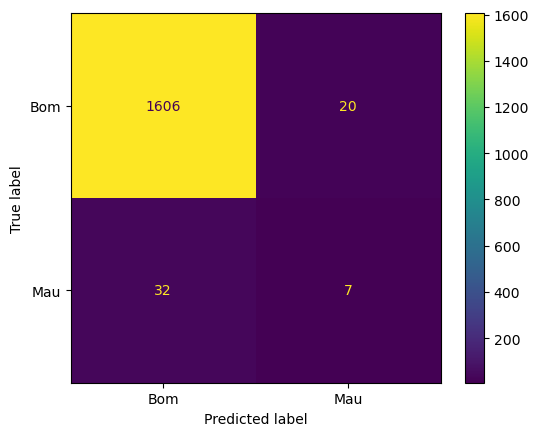

Wall time: 12.2 s


In [11]:
%%time
# criação da figura árvore de decisão
salvar_arvore(dtc, 'arvore1.jpg')

# validação da árvore de decisão
validar_arvore(y_test,y_pred_arvore_decisao)
plot_confusion_matrix(dtc, X_test, y_test, display_labels=['Bom', 'Mau'])  
plt.show()

In [12]:
print(dtc)
print(f'Produndidade da árvore = {dtc.get_depth()}')
print(f'Nº de folhas da árvore = {dtc.get_n_leaves()}')

DecisionTreeClassifier(random_state=0)
Produndidade da árvore = 26
Nº de folhas da árvore = 530


In [13]:
#Execução do classificador DecisionTreeClassifier
dtc = tree.DecisionTreeClassifier(max_depth=10,random_state=0)
y_pred_arvore_decisao = executar_classificador(dtc,X_train,X_test, y_train)
validar_arvore(y_test,y_pred_arvore_decisao)

MÉTRICAS DA ÁRVORE
Acurácia = 97.42%
Precisão = 30.0%
Recall da árvore = 7.69%

Matriz de confusão
 [[1619    7]
 [  36    3]]


In [14]:
#Execução do classificador DecisionTreeClassifier
dtc = tree.DecisionTreeClassifier(max_depth=10,min_samples_leaf=10,random_state=0)
y_pred_arvore_decisao = executar_classificador(dtc,X_train,X_test, y_train)
validar_arvore(y_test,y_pred_arvore_decisao)

MÉTRICAS DA ÁRVORE
Acurácia = 97.6%
Precisão = 40.0%
Recall da árvore = 5.13%

Matriz de confusão
 [[1623    3]
 [  37    2]]


In [15]:
dtc = tree.DecisionTreeClassifier(max_depth=5,random_state=0)
y_pred_arvore_decisao = executar_classificador(dtc,X_train,X_test, y_train)
validar_arvore(y_test,y_pred_arvore_decisao)

MÉTRICAS DA ÁRVORE
Acurácia = 97.72%
Precisão = 60.0%
Recall da árvore = 7.69%

Matriz de confusão
 [[1624    2]
 [  36    3]]


### Utilizando bagging com Random Forest

In [16]:
%%time

classificador_random_forest = RandomForestClassifier(n_estimators=100,

                                                    random_state=0)

y_pred_random_forest = executar_classificador(classificador_random_forest, X_train, X_test, y_train)

Wall time: 950 ms


In [17]:
salvar_arvore(classificador_random_forest.estimators_[0], 'random_forest1')
salvar_arvore(classificador_random_forest.estimators_[1], 'random_forest2')

In [18]:
%%time
print(f'* Árvore de decisão *')
print (('=') * 21)
validar_arvore(y_test,y_pred_arvore_decisao)
print(f'\n* Árvore Random Forest *')
print (('=') * 24)
validar_arvore(y_test,y_pred_random_forest)

* Árvore de decisão *
MÉTRICAS DA ÁRVORE
Acurácia = 97.72%
Precisão = 60.0%
Recall da árvore = 7.69%

Matriz de confusão
 [[1624    2]
 [  36    3]]

* Árvore Random Forest *
MÉTRICAS DA ÁRVORE
Acurácia = 97.36%
Precisão = 33.33%
Recall da árvore = 12.82%

Matriz de confusão
 [[1616   10]
 [  34    5]]
Wall time: 11.7 ms


In [19]:
%%time
classificador_random_forest = RandomForestClassifier(n_estimators=50,
                                                     max_depth=10,
                                                    random_state=0)
y_pred_random_forest = executar_classificador(classificador_random_forest, X_train, X_test, y_train)

Wall time: 389 ms


In [20]:
print(f'* Árvore de decisão *')
print (('=') * 21)
validar_arvore(y_test,y_pred_arvore_decisao)
print(f'\n* Árvore Random Forest *')
print (('=') * 24)
validar_arvore(y_test,y_pred_random_forest)

* Árvore de decisão *
MÉTRICAS DA ÁRVORE
Acurácia = 97.72%
Precisão = 60.0%
Recall da árvore = 7.69%

Matriz de confusão
 [[1624    2]
 [  36    3]]

* Árvore Random Forest *
MÉTRICAS DA ÁRVORE
Acurácia = 97.66%
Precisão = 50.0%
Recall da árvore = 2.56%

Matriz de confusão
 [[1625    1]
 [  38    1]]


### Agregação com o AdaBoost

In [21]:
%%time
classificador_adaboost = AdaBoostClassifier(random_state=0)
y_pred_adaboost = executar_classificador(classificador_adaboost,X_train,X_test, y_train)

Wall time: 541 ms


In [22]:
salvar_arvore(classificador_adaboost.estimators_[0],'adabost1')
salvar_arvore(classificador_adaboost.estimators_[1],'adabost2')
validar_arvore(y_test,y_pred_adaboost)

MÉTRICAS DA ÁRVORE
Acurácia = 97.66%
Precisão = 0.0%
Recall da árvore = 0.0%

Matriz de confusão
 [[1626    0]
 [  39    0]]
